In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df=pd.read_csv('Chapter4_PE_Income_Spending_DataSet.csv')

In [19]:
df.describe()

Petroleum_Engineer_Age  Petroleum_Engineer_Income (K$)  \
count              200.000000                      200.000000   
mean                38.850000                      140.000000   
std                 13.969007                       60.717651   
min                 18.000000                       34.676354   
25%                 28.750000                       95.937913   
50%                 36.000000                      142.173052   
75%                 49.000000                      180.317041   
max                 70.000000                      316.710700   

       Spending_Habits (From 1 to 100)  
count                       200.000000  
mean                         47.690000  
std                          24.532346  
min                           0.950000  
25%                          33.012500  
50%                          47.500000  
75%                          69.350000  
max                          94.050000

In [20]:
df=pd.get_dummies(df,drop_first=True)

In [21]:
df

Petroleum_Engineer_Age  Petroleum_Engineer_Income (K$)  \
0                        19                       34.676354   
1                        21                       34.676354   
2                        20                       36.988111   
3                        23                       36.988111   
4                        31                       39.299868   
..                      ...                             ...   
195                      35                      277.410832   
196                      45                      291.281374   
197                      32                      291.281374   
198                      32                      316.710700   
199                      30                      316.710700   

     Spending_Habits (From 1 to 100)  Petroleum_Engineer_Gender_Male  
0                              37.05                               1  
1                              76.95                               1  
2                               5.70                               0  
3                              73.15                               0  
4                              38.00                               0  
..                               ...                             ...  
195                            75.05                               0  
196                            26.60                               0  
197                            70.30                               1  
198                            17.10                               1  
199                            78.85                               1  

[200 rows x 4 columns]

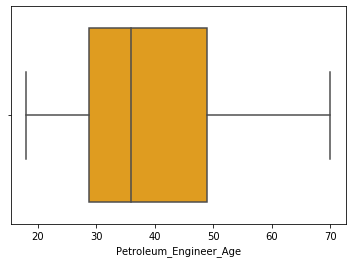

In [22]:
sns.boxplot(df['Petroleum_Engineer_Age'], color='orange')

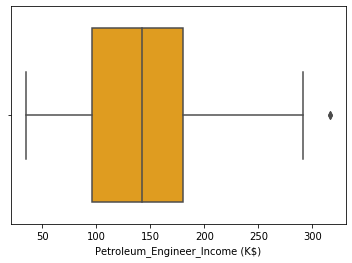

In [23]:
sns.boxplot(df['Petroleum_Engineer_Income (K$)'], color='orange')

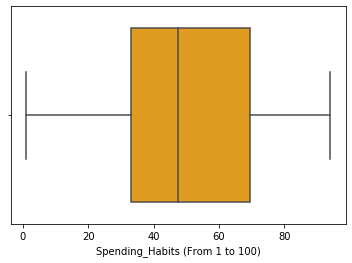

In [24]:
sns.boxplot(df['Spending_Habits (From 1 to 100)'], color='orange')

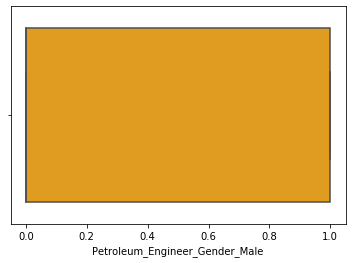

In [25]:
sns.boxplot(df['Petroleum_Engineer_Gender_Male'], color='orange')

In [26]:
df.columns

Index(['Petroleum_Engineer_Age', 'Petroleum_Engineer_Income (K$)',
       'Spending_Habits (From 1 to 100)', 'Petroleum_Engineer_Gender_Male'],
      dtype='object')

In [27]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100,max_samples=250,random_state=100, contamination=0.1) 
clf.fit(df)

C:\Users\Hoss\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:281: UserWarning: max_samples (250) is greater than the total number of samples (200). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples=250, n_estimators=100,
                n_jobs=None, random_state=100, verbose=0, warm_start=False)

In [28]:
df.iloc[:,:4]

Petroleum_Engineer_Age  Petroleum_Engineer_Income (K$)  \
0                        19                       34.676354   
1                        21                       34.676354   
2                        20                       36.988111   
3                        23                       36.988111   
4                        31                       39.299868   
..                      ...                             ...   
195                      35                      277.410832   
196                      45                      291.281374   
197                      32                      291.281374   
198                      32                      316.710700   
199                      30                      316.710700   

     Spending_Habits (From 1 to 100)  Petroleum_Engineer_Gender_Male  
0                              37.05                               1  
1                              76.95                               1  
2                               5.70                               0  
3                              73.15                               0  
4                              38.00                               0  
..                               ...                             ...  
195                            75.05                               0  
196                            26.60                               0  
197                            70.30                               1  
198                            17.10                               1  
199                            78.85                               1  

[200 rows x 4 columns]

Text(0.5, 1.0, 'Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

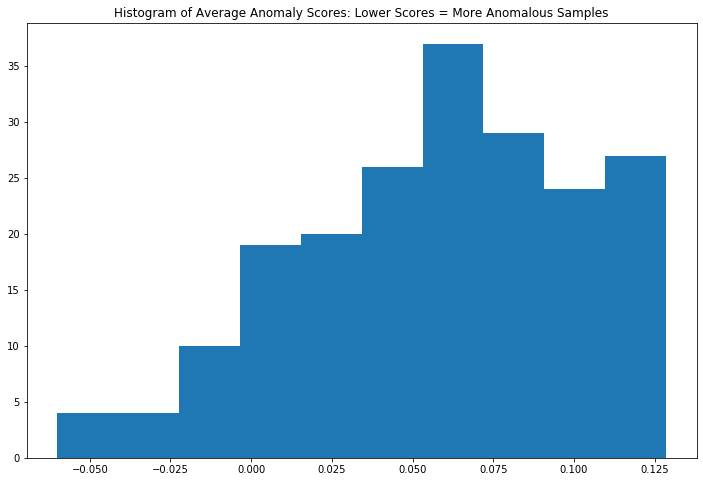

In [29]:
df['Scores']=clf.decision_function(df)
plt.figure(figsize=(12,8))
plt.hist(df['Scores'])
plt.title('Histogram of Average Anomaly Scores: Lower Scores = More Anomalous Samples')

In [30]:
df

Petroleum_Engineer_Age  Petroleum_Engineer_Income (K$)  \
0                        19                       34.676354   
1                        21                       34.676354   
2                        20                       36.988111   
3                        23                       36.988111   
4                        31                       39.299868   
..                      ...                             ...   
195                      35                      277.410832   
196                      45                      291.281374   
197                      32                      291.281374   
198                      32                      316.710700   
199                      30                      316.710700   

     Spending_Habits (From 1 to 100)  Petroleum_Engineer_Gender_Male    Scores  
0                              37.05                               1 -0.032601  
1                              76.95                               1 -0.004939  
2                               5.70                               0 -0.060046  
3                              73.15                               0  0.054590  
4                              38.00                               0  0.048783  
..                               ...                             ...       ...  
195                            75.05                               0  0.008952  
196                            26.60                               0 -0.033078  
197                            70.30                               1  0.006787  
198                            17.10                               1 -0.044971  
199                            78.85                               1 -0.040957  

[200 rows x 5 columns]

In [31]:
df['Anomaly']=clf.predict(df.iloc[:,:4])
Anomaly=df.loc[df['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
Anomaly

Petroleum_Engineer_Age  Petroleum_Engineer_Income (K$)  \
0                        19                       34.676354   
1                        21                       34.676354   
2                        20                       36.988111   
6                        35                       41.611625   
8                        64                       43.923382   
10                       67                       43.923382   
12                       58                       46.235139   
14                       37                       46.235139   
18                       52                       53.170410   
30                       60                       69.352708   
32                       53                       76.287979   
33                       18                       76.287979   
40                       65                       87.846764   
140                      57                      173.381770   
162                      19                      187.252312   
178                      59                      214.993395   
194                      47                      277.410832   
196                      45                      291.281374   
198                      32                      316.710700   
199                      30                      316.710700   

     Spending_Habits (From 1 to 100)  Petroleum_Engineer_Gender_Male  \
0                              37.05                               1   
1                              76.95                               1   
2                               5.70                               0   
6                               5.70                               0   
8                               2.85                               1   
10                             13.30                               1   
12                             14.25                               0   
14                             12.35                               1   
18                             27.55                               1   
30                              3.80                               1   
32                              3.80                               1   
33                             87.40                               1   
40                             33.25                               0   
140                             4.75                               0   
162                             4.75                               1   
178                            13.30                               1   
194                            15.20                               0   
196                            26.60                               0   
198                            17.10                               1   
199                            78.85                               1   

       Scores  Anomaly  
0   -0.032601       -1  
1   -0.004939       -1  
2   -0.060046       -1  
6   -0.006933       -1  
8   -0.058308       -1  
10  -0.058579       -1  
12  -0.012855       -1  
14  -0.010101       -1  
18  -0.008263       -1  
30  -0.011495       -1  
32  -0.000866       -1  
33  -0.024124       -1  
40  -0.001817       -1  
140 -0.014385       -1  
162 -0.006069       -1  
178 -0.005844       -1  
194 -0.009086       -1  
196 -0.033078       -1  
198 -0.044971       -1  
199 -0.040957       -1

Text(0.5, 1.0, 'Isolation Forest Anomalies')

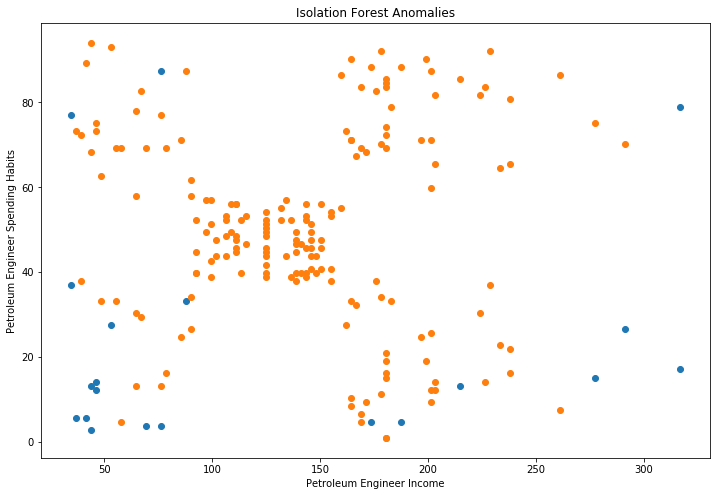

In [32]:
plt.figure(figsize=(12,8))
groups = df.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Isolation Forest Anomalies')    